## Week 6 Part 2

**Part 1** Use the level-sets method to implement constant motion. Consider simply an image as the embedding function and deform it according to the corresponding equation, It=|∇I|. Implement also It=−|∇I|. Observe the result of both cases for different evolution intervals. 

**Part 2** Repeat the above exercise but now for each level set moving according to curvature motion. 

*Note, key parts of the code adapted from https://github.com/burakbayramli/classnotes/tree/master/pde/pde_level.  Thanks to the tip from Robert Metchev.*

In [1]:
from __future__ import division, print_function

import numpy as np
from matplotlib import pyplot as plt
import time

from skimage import img_as_float
from skimage import io
from skimage.color import rgb2gray

%matplotlib inline

In [2]:
# Plotting functions

def plot_1xc(imgs_list, titles_list, save_file=None):
    cols = len(imgs_list)
    i = 0
    
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(15,15))
    for c in range(cols):
        axes[c].imshow(imgs_list[i], cmap="gray")
        axes[c].set_title(titles_list[i], size=20)
        axes[c].set_xticks([])
        axes[c].set_yticks([])
        i = i + 1
    plt.tight_layout();
    
    if not (save_file == None):
        filename = time.strftime("%Y%m%d_%H%M") + "_" + save_file + ".png"
        fig.savefig(filename, bbox_inches='tight')
        
def plot_rxc(imgs_list, titles_list, ncol=3, save_file=None):
    cols = ncol
    rows = np.ceil(len(imgs_list)/cols).astype(int)
    if rows==1:
        plot_1xc(imgs_list, titles_list, save_file)
    else:
        i = 0
    
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15*rows/cols))
        for r in range(rows):
            for c in range(cols):
                if i < len(imgs_list):
                    axes[r,c].imshow(imgs_list[i], cmap="gray")
                    axes[r,c].set_title(titles_list[i], size=20)
                    axes[r,c].set_xticks([])
                    axes[r,c].set_yticks([])
                i = i + 1
        plt.tight_layout();
    
        if not (save_file == None):
            filename = time.strftime("%Y%m%d_%H%M") + "_" + save_file + ".png"
            fig.savefig(filename, bbox_inches='tight')

In [3]:
O = io.imread("../images/ellipse_100.png")
O = img_as_float(O)
I = rgb2gray(O)

-0.0479605987763 1.0
-0.000184628868607 0.999999173481
-1.07636383862e-05 0.999562539272
-8.71896026676e-05 0.96873063802
-9.05140530078e-05 0.467976395874


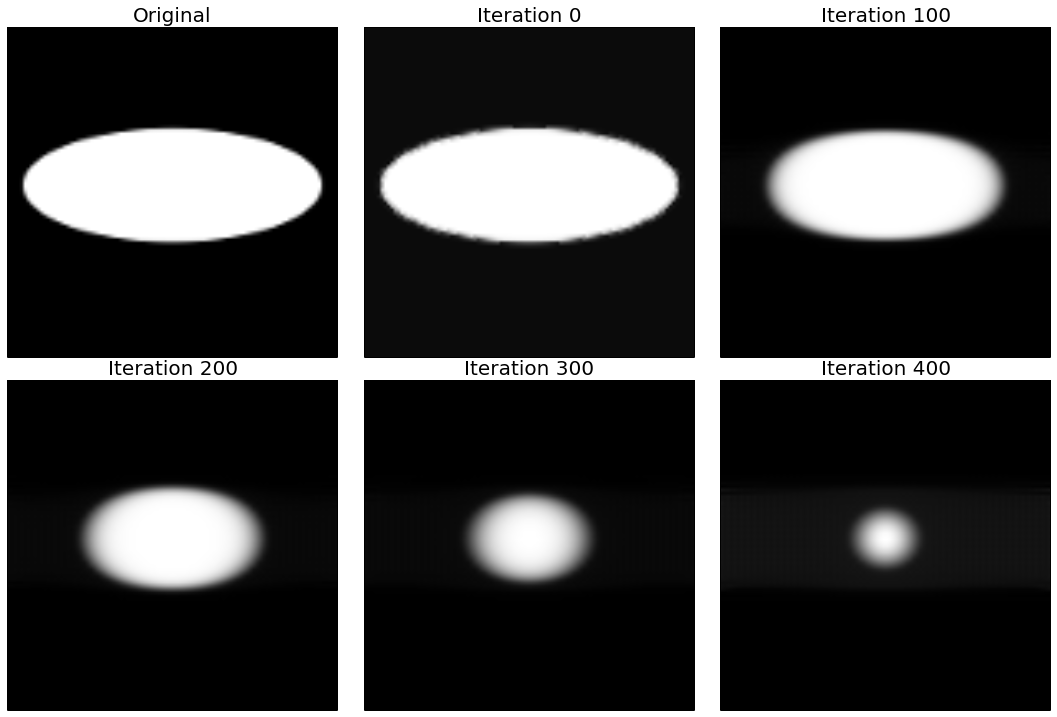

In [4]:
def dphi_dt(phi):
    # Gradient.  Note reversed 'x' and 'y'.
    # gradx, grady = np.gradient(phi) # Doesn't work.
    grady, gradx = np.gradient(phi)
    gradm = np.sqrt(gradx**2 + grady**2)

    # Norm.
    normx = gradx/(gradm + (gradm==0))
    normy = grady/(gradm + (gradm==0))
    
    # Div.  Note 'x' and 'y' reversed again.
    junk, divxx = np.gradient(normx)
    divyy, junk = np.gradient(normy)

    # Curvature.
    kappa = divxx + divyy
    
    return kappa * gradm

ims = []
titles = []

phi_old = I.copy()
ims.append(phi_old)
titles.append("Original")

for i in range(401):
    phi_new = phi_old + dphi_dt(phi_old)
    if i % 100 == 0:
        print(np.min(phi_new), np.max(phi_new))
        ims.append(phi_new)
        titles.append("Iteration " + str(i))
    phi_old = phi_new

plot_rxc(ims, titles, save_file="curvature_motion")